In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
emp = pd.read_csv('C:/Lohit/PROJECTS/Starbucks Project/Employee_Dataset.csv')
star = pd.read_csv('C:/Lohit/PROJECTS/Starbucks Project/Starbucks_Data.csv')

In [156]:
print(f"The employee dataset has {emp.shape[0]} rows and {emp.shape[1]} columns")
print(f"The starbucks dataset has {star.shape[0]} rows and {star.shape[1]} columns")

The employee dataset has 10000 rows and 10 columns
The starbucks dataset has 20 rows and 4 columns


Lets now look at the information about the Employee table

In [157]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   employee_id         10000 non-null  object
 1   name                10000 non-null  object
 2   department          10000 non-null  object
 3   shift               10000 non-null  object
 4   timestamp           10000 non-null  object
 5   season              10000 non-null  object
 6   starbucks_id        10000 non-null  object
 7   order_time          9999 non-null   object
 8   pickup_time         9999 non-null   object
 9   pickup_time_actual  9999 non-null   object
dtypes: object(10)
memory usage: 781.4+ KB


In [158]:
emp.head()

,employee_id,name,department,shift,timestamp,season,starbucks_id,order_time,pickup_time,pickup_time_actual
0,1XUFNY4V,Charlie Williams,Finance,morning,18-06-2024,Spring,S16,18-06-2024 09:29,18-06-2024 09:39,18-06-2024 09:55
1,XLO7WEVF,Fay Garcia,IT,morning,17-04-2024,Spring,S18,17-04-2024 12:36,17-04-2024 12:46,17-04-2024 13:06
2,ULHQDS7U,Fay Davis,Customer Service,evening,12-03-2025,Spring,S2,12-03-2025 18:53,12-03-2025 19:03,12-03-2025 19:20
3,LQ32ORHQ,Charlie Jones,HR,night,16-06-2024,Spring,S14,17-06-2024 02:44,17-06-2024 02:54,17-06-2024 02:59
4,YKKIM0YM,Jack Williams,HR,evening,19-02-2025,Winter,S2,19-02-2025 21:54,19-02-2025 22:04,19-02-2025 22:12


Lets change the data type of timestamp from object to datetime

In [159]:
# Parse the 'timestamp', 'order_time', and 'pickup_time' columns with the correct format
emp['timestamp'] = pd.to_datetime(emp['timestamp'], errors='coerce', dayfirst=True)
emp['order_time'] = pd.to_datetime(emp['order_time'], errors='coerce', dayfirst=True)
emp['pickup_time'] = pd.to_datetime(emp['pickup_time'], errors='coerce', dayfirst=True)
emp['pickup_time_actual'] = pd.to_datetime(emp['pickup_time_actual'], errors='coerce', dayfirst=True)

emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   employee_id         10000 non-null  object        
 1   name                10000 non-null  object        
 2   department          10000 non-null  object        
 3   shift               10000 non-null  object        
 4   timestamp           9999 non-null   datetime64[ns]
 5   season              10000 non-null  object        
 6   starbucks_id        10000 non-null  object        
 7   order_time          9999 non-null   datetime64[ns]
 8   pickup_time         9999 non-null   datetime64[ns]
 9   pickup_time_actual  9999 non-null   datetime64[ns]
dtypes: datetime64[ns](4), object(6)
memory usage: 781.4+ KB


Lets now check the information about the starbucks table

In [160]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   starbucks_id               20 non-null     object
 1   drink_name                 20 non-null     object
 2   description                20 non-null     object
 3   average_making_time (min)  20 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 772.0+ bytes


In [161]:
# Ensure that the 'starbucks_id' columns are of the same type (string)
emp['starbucks_id'] = emp['starbucks_id'].astype(str)
star['starbucks_id'] = star['starbucks_id'].astype(str)

In [162]:
df = pd.merge(emp,star, on='starbucks_id', how='inner')
df.head()

,employee_id,name,department,shift,timestamp,season,starbucks_id,order_time,pickup_time,pickup_time_actual,drink_name,description,average_making_time (min)
0,1XUFNY4V,Charlie Williams,Finance,morning,2024-06-18,Spring,S16,2024-06-18 09:29:00,2024-06-18 09:39:00,2024-06-18 09:55:00,Iced Tea Lemonade (Various),"Iced tea with lemonade, available in black, gr...",4
1,XLO7WEVF,Fay Garcia,IT,morning,2024-04-17,Spring,S18,2024-04-17 12:36:00,2024-04-17 12:46:00,2024-04-17 13:06:00,Dragon Drink,"Mango dragonfruit refresher with coconut milk,...",4
2,ULHQDS7U,Fay Davis,Customer Service,evening,2025-03-12,Spring,S2,2025-03-12 18:53:00,2025-03-12 19:03:00,2025-03-12 19:20:00,Caramel Macchiato,"Espresso with steamed milk, vanilla syrup, and...",4
3,LQ32ORHQ,Charlie Jones,HR,night,2024-06-16,Spring,S14,2024-06-17 02:44:00,2024-06-17 02:54:00,2024-06-17 02:59:00,Green Tea Latte,Matcha green tea powder with steamed milk and ...,4
4,YKKIM0YM,Jack Williams,HR,evening,2025-02-19,Winter,S2,2025-02-19 21:54:00,2025-02-19 22:04:00,2025-02-19 22:12:00,Caramel Macchiato,"Espresso with steamed milk, vanilla syrup, and...",4


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   employee_id                10000 non-null  object        
 1   name                       10000 non-null  object        
 2   department                 10000 non-null  object        
 3   shift                      10000 non-null  object        
 4   timestamp                  9999 non-null   datetime64[ns]
 5   season                     10000 non-null  object        
 6   starbucks_id               10000 non-null  object        
 7   order_time                 9999 non-null   datetime64[ns]
 8   pickup_time                9999 non-null   datetime64[ns]
 9   pickup_time_actual         9999 non-null   datetime64[ns]
 10  drink_name                 10000 non-null  object        
 11  description                10000 non-null  object        
 12  avera

In [164]:
df['wait_time'] = (df['pickup_time_actual'] - df['order_time']).dt.total_seconds()/60
df.head()

,employee_id,name,department,shift,timestamp,season,starbucks_id,order_time,pickup_time,pickup_time_actual,drink_name,description,average_making_time (min),wait_time
0,1XUFNY4V,Charlie Williams,Finance,morning,2024-06-18,Spring,S16,2024-06-18 09:29:00,2024-06-18 09:39:00,2024-06-18 09:55:00,Iced Tea Lemonade (Various),"Iced tea with lemonade, available in black, gr...",4,26.0
1,XLO7WEVF,Fay Garcia,IT,morning,2024-04-17,Spring,S18,2024-04-17 12:36:00,2024-04-17 12:46:00,2024-04-17 13:06:00,Dragon Drink,"Mango dragonfruit refresher with coconut milk,...",4,30.0
2,ULHQDS7U,Fay Davis,Customer Service,evening,2025-03-12,Spring,S2,2025-03-12 18:53:00,2025-03-12 19:03:00,2025-03-12 19:20:00,Caramel Macchiato,"Espresso with steamed milk, vanilla syrup, and...",4,27.0
3,LQ32ORHQ,Charlie Jones,HR,night,2024-06-16,Spring,S14,2024-06-17 02:44:00,2024-06-17 02:54:00,2024-06-17 02:59:00,Green Tea Latte,Matcha green tea powder with steamed milk and ...,4,15.0
4,YKKIM0YM,Jack Williams,HR,evening,2025-02-19,Winter,S2,2025-02-19 21:54:00,2025-02-19 22:04:00,2025-02-19 22:12:00,Caramel Macchiato,"Espresso with steamed milk, vanilla syrup, and...",4,18.0


<Axes: >

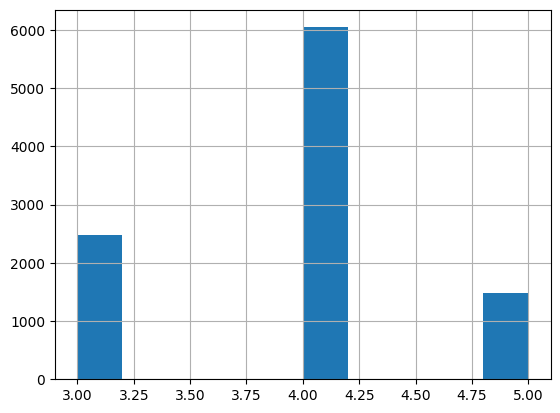

In [165]:
df['average_making_time (min)'].hist()

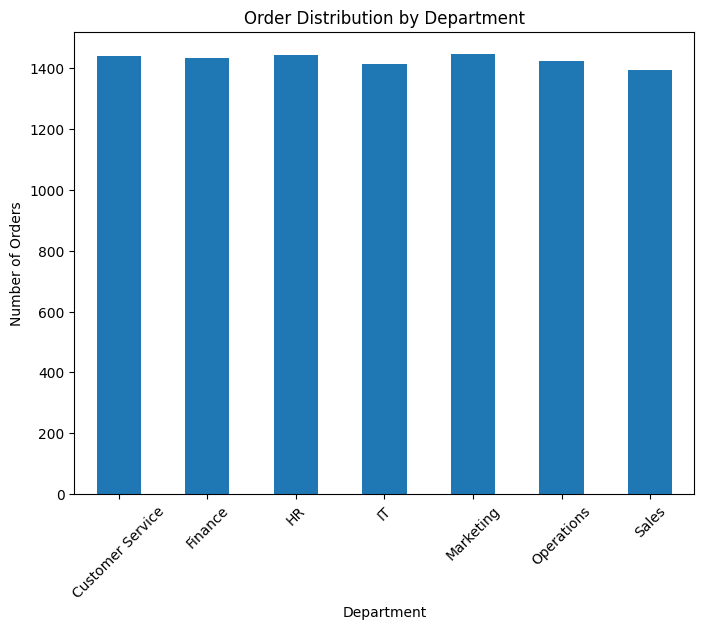

In [166]:
# Assuming 'df' is your DataFrame
department_order_counts = df.groupby('department').size()

# Plotting the bar chart
plt.figure(figsize=(8,6))
department_order_counts.plot(kind='bar')
plt.title('Order Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


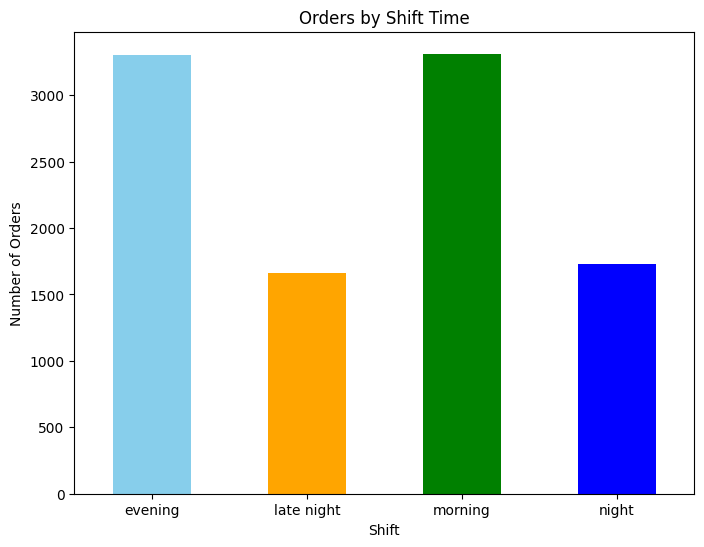

In [167]:
# Group by shift and count the number of orders
shift_order_counts = df.groupby('shift').size()

# Plotting the bar chart
plt.figure(figsize=(8,6))
shift_order_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'blue'])
plt.title('Orders by Shift Time')
plt.xlabel('Shift')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


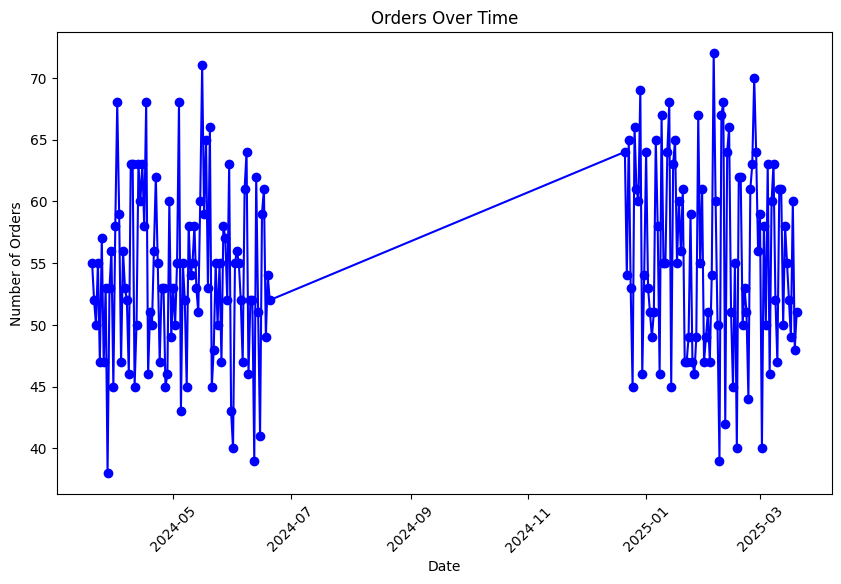

In [168]:
# Convert timestamp to datetime and extract the date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

# Group by date and count the orders
orders_over_time = df.groupby('date').size()

# Plotting the line chart
plt.figure(figsize=(10,6))
orders_over_time.plot(kind='line', marker='o', color='b')
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


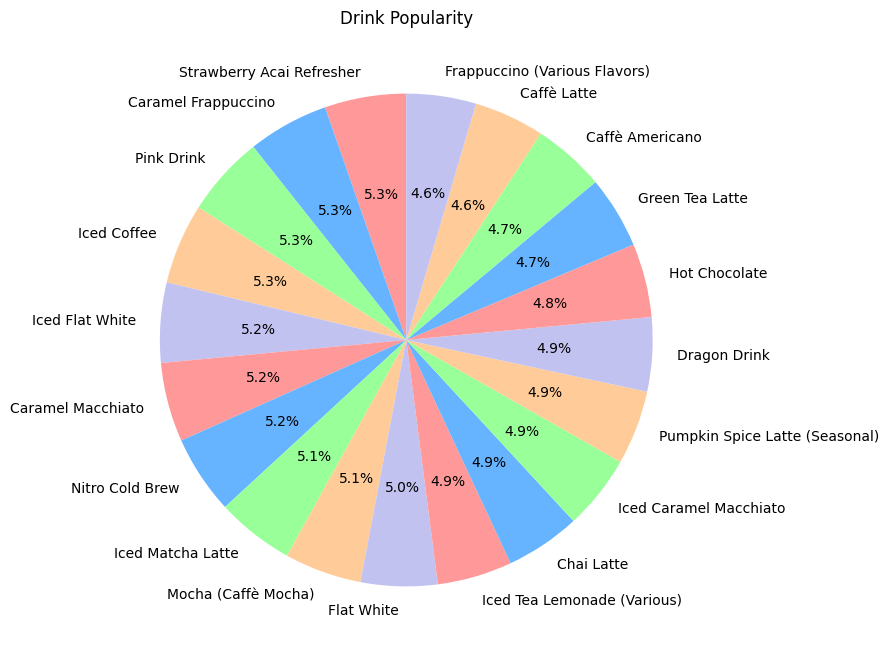

In [169]:
# Count the occurrences of each drink
drink_popularity = df['drink_name'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8,8))
drink_popularity.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Drink Popularity')
plt.ylabel('')  # Hide the y-axis label
plt.show()


In [170]:
spring_df = df[df['season'] == 'Spring']
spring_df.head()

,employee_id,name,department,shift,timestamp,season,starbucks_id,order_time,pickup_time,pickup_time_actual,drink_name,description,average_making_time (min),wait_time,date
0,1XUFNY4V,Charlie Williams,Finance,morning,2024-06-18,Spring,S16,2024-06-18 09:29:00,2024-06-18 09:39:00,2024-06-18 09:55:00,Iced Tea Lemonade (Various),"Iced tea with lemonade, available in black, gr...",4,26.0,2024-06-18
1,XLO7WEVF,Fay Garcia,IT,morning,2024-04-17,Spring,S18,2024-04-17 12:36:00,2024-04-17 12:46:00,2024-04-17 13:06:00,Dragon Drink,"Mango dragonfruit refresher with coconut milk,...",4,30.0,2024-04-17
2,ULHQDS7U,Fay Davis,Customer Service,evening,2025-03-12,Spring,S2,2025-03-12 18:53:00,2025-03-12 19:03:00,2025-03-12 19:20:00,Caramel Macchiato,"Espresso with steamed milk, vanilla syrup, and...",4,27.0,2025-03-12
3,LQ32ORHQ,Charlie Jones,HR,night,2024-06-16,Spring,S14,2024-06-17 02:44:00,2024-06-17 02:54:00,2024-06-17 02:59:00,Green Tea Latte,Matcha green tea powder with steamed milk and ...,4,15.0,2024-06-16
5,MCL87XTN,Charlie Hernandez,IT,morning,2025-03-10,Spring,S3,2025-03-10 13:50:00,2025-03-10 14:00:00,2025-03-10 14:05:00,Caffè Latte,Espresso with steamed milk and a thin layer of...,3,15.0,2025-03-10


In [171]:
spring_df = spring_df.sort_values(by='order_time', ascending=False)

spring_df.head()

,employee_id,name,department,shift,timestamp,season,starbucks_id,order_time,pickup_time,pickup_time_actual,drink_name,description,average_making_time (min),wait_time,date
8406,UUUXJFSL,Ian Miller,HR,late night,2025-03-20,Spring,S18,2025-03-21 06:40:00,2025-03-21 06:50:00,2025-03-21 06:51:00,Dragon Drink,"Mango dragonfruit refresher with coconut milk,...",4,11.0,2025-03-20
4806,EPDRSOE7,Eva Hernandez,Operations,late night,2025-03-20,Spring,S17,2025-03-21 05:15:00,2025-03-21 05:25:00,2025-03-21 05:38:00,Pink Drink,"Coconut milk, strawberry acai refresher, and f...",4,23.0,2025-03-20
449,OR7631FQ,Jack Martinez,Operations,night,2025-03-20,Spring,S3,2025-03-21 05:12:00,2025-03-21 05:22:00,2025-03-21 05:17:00,Caffè Latte,Espresso with steamed milk and a thin layer of...,3,5.0,2025-03-20
3579,D3WDQYIP,Alice Smith,Finance,late night,2025-03-20,Spring,S20,2025-03-21 04:39:00,2025-03-21 04:49:00,2025-03-21 04:48:00,Hot Chocolate,Steamed milk with cocoa powder and topped with...,4,9.0,2025-03-20
4012,MCD9CS1H,Charlie Smith,Finance,late night,2025-03-20,Spring,S4,2025-03-21 04:08:00,2025-03-21 04:18:00,2025-03-21 04:13:00,Mocha (Caffè Mocha),"Espresso with steamed milk, mocha syrup, and w...",4,5.0,2025-03-20


In [172]:
spring_df.count()

employee_id                  6081
name                         6081
department                   6081
shift                        6081
timestamp                    6081
season                       6081
starbucks_id                 6081
order_time                   6081
pickup_time                  6081
pickup_time_actual           6081
drink_name                   6081
description                  6081
average_making_time (min)    6081
wait_time                    6081
date                         6081
dtype: int64

In [173]:
shift_drink_counts = spring_df.groupby('shift')['employee_id'].nunique()
shift_drink_counts

shift
evening       2000
late night    1043
morning       2023
night         1015
Name: employee_id, dtype: int64

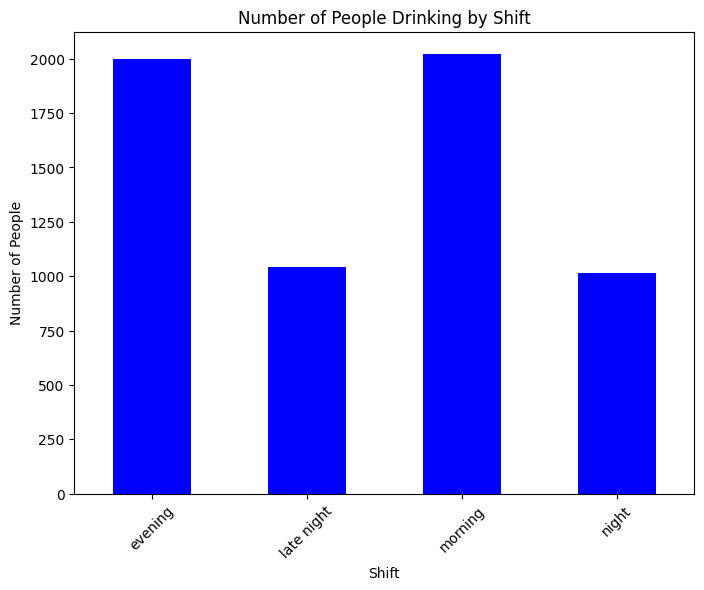

In [174]:
shift_drink_counts.plot(kind='bar', figsize=(8, 6), color='blue')
plt.title('Number of People Drinking by Shift')
plt.xlabel('Shift')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()

In [182]:
print(spring_df.info())  # Check column types
print(spring_df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
Index: 6081 entries, 8406 to 3816
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   employee_id                6081 non-null   object        
 1   name                       6081 non-null   object        
 2   department                 6081 non-null   object        
 3   shift                      6081 non-null   object        
 4   timestamp                  6081 non-null   datetime64[ns]
 5   season                     6081 non-null   object        
 6   starbucks_id               6081 non-null   object        
 7   order_time                 6081 non-null   datetime64[ns]
 8   pickup_time                6081 non-null   datetime64[ns]
 9   pickup_time_actual         6081 non-null   datetime64[ns]
 10  drink_name                 6081 non-null   object        
 11  description                6081 non-null   object        
 12  average_

In [183]:
# Select only numeric columns for correlation calculation
numeric_df = spring_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation of each feature with the target variable 'wait_time'
print(correlation_matrix['wait_time'])


average_making_time (min)    0.010067
wait_time                    1.000000
Name: wait_time, dtype: float64


In [184]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()
spring_df['shift_encoded'] = le.fit_transform(spring_df['shift'])
spring_df['season_encoded'] = le.fit_transform(spring_df['season'])
spring_df['drink_name_encoded'] = le.fit_transform(spring_df['drink_name'])
spring_df['employee_id_encoded'] = le.fit_transform(spring_df['employee_id'])

# Assuming 'wait_time' is the target variable
X = spring_df[['shift_encoded', 'season_encoded', 'drink_name_encoded', 'employee_id_encoded']]
y = spring_df['wait_time']

# Perform the Chi-Square test
chi2_stat, p_val = chi2(X, y)
print(p_val)  # A p-value < 0.05 indicates significant association


[9.98759087e-01            nan 2.45592269e-11 0.00000000e+00]


In [188]:
clean_spring_df = spring_df.drop(columns=['name','season','order_time','pickup_time','pickup_time_actual','department','timestamp','date','description'])
clean_spring_df = clean_spring_df.drop(columns=['shift_encoded','season_encoded','drink_name_encoded','employee_id_encoded'])
clean_spring_df.head()

,employee_id,shift,starbucks_id,drink_name,average_making_time (min),wait_time
8406,UUUXJFSL,late night,S18,Dragon Drink,4,11.0
4806,EPDRSOE7,late night,S17,Pink Drink,4,23.0
449,OR7631FQ,night,S3,Caffè Latte,3,5.0
3579,D3WDQYIP,late night,S20,Hot Chocolate,4,9.0
4012,MCD9CS1H,late night,S4,Mocha (Caffè Mocha),4,5.0


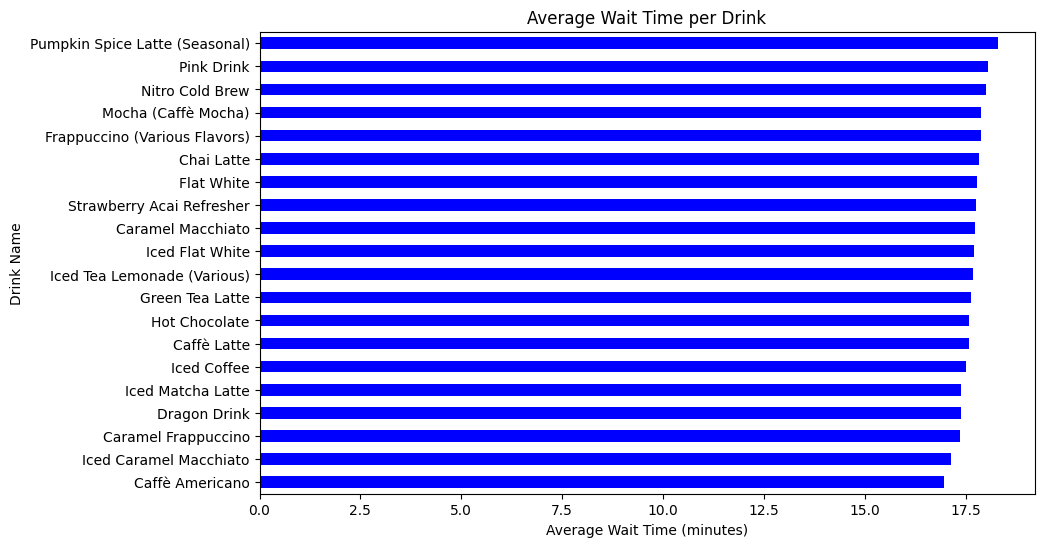

In [180]:
# Group by 'drink_name', calculate average wait time, and sort the values
avg_wait_time = clean_spring_df.groupby('drink_name')['wait_time'].mean().sort_values()

# Plotting the average wait times
plt.figure(figsize=(10, 6))
avg_wait_time.plot(kind='barh', color='blue')
plt.title('Average Wait Time per Drink')
plt.xlabel('Average Wait Time (minutes)')
plt.ylabel('Drink Name')
plt.show()


In [200]:
clean_df = df.drop(columns=['name','season','pickup_time_actual','department','timestamp','date','description'])

clean_df.head()

,employee_id,shift,starbucks_id,order_time,pickup_time,drink_name,average_making_time (min),wait_time
0,1XUFNY4V,morning,S16,2024-06-18 09:29:00,2024-06-18 09:39:00,Iced Tea Lemonade (Various),4,26.0
1,XLO7WEVF,morning,S18,2024-04-17 12:36:00,2024-04-17 12:46:00,Dragon Drink,4,30.0
2,ULHQDS7U,evening,S2,2025-03-12 18:53:00,2025-03-12 19:03:00,Caramel Macchiato,4,27.0
3,LQ32ORHQ,night,S14,2024-06-17 02:44:00,2024-06-17 02:54:00,Green Tea Latte,4,15.0
4,YKKIM0YM,evening,S2,2025-02-19 21:54:00,2025-02-19 22:04:00,Caramel Macchiato,4,18.0


In [201]:
# Drop the row with the missing 'wait_time' value
clean_df = clean_df.dropna(subset=['wait_time'])

# Check again for missing values
print(clean_df.isnull().sum())


employee_id                  0
shift                        0
starbucks_id                 0
order_time                   0
pickup_time                  0
drink_name                   0
average_making_time (min)    0
wait_time                    0
dtype: int64


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features (employee_id, shift, drink_name, starbucks_id)
le = LabelEncoder()
clean_df['shift_encoded'] = le.fit_transform(clean_df['shift'])
clean_df['drink_name_encoded'] = le.fit_transform(clean_df['drink_name'])
clean_df['employee_id_encoded'] = le.fit_transform(clean_df['employee_id'])
clean_df['starbucks_id_encoded'] = le.fit_transform(clean_df['starbucks_id'])

# Feature set (X) and target variable (y)
X = clean_df[['shift_encoded', 'drink_name_encoded', 'employee_id_encoded', 'average_making_time (min)']]
y = clean_df['wait_time']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values
print(clean_df.isnull().sum())


employee_id                  0
shift                        0
starbucks_id                 0
order_time                   0
pickup_time                  0
drink_name                   0
average_making_time (min)    0
wait_time                    0
shift_encoded                0
drink_name_encoded           0
employee_id_encoded          0
starbucks_id_encoded         0
dtype: int64


In [203]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 6.982135
Mean Squared Error (MSE): 68.50327184999999


In [ ]:
# Extract hour of day from 'order_time' or 'pickup_time'
clean_df['order_hour'] = clean_df['order_time'].dt.hour
clean_df['pickup_hour'] = clean_df['pickup_time'].dt.hour

# Extract day of week (0 = Monday, 6 = Sunday)
clean_df['order_dayofweek'] = clean_df['order_time'].dt.dayofweek
clean_df['pickup_dayofweek'] = clean_df['pickup_time'].dt.dayofweek

# Extract if the order was placed on a weekend (1 for weekend, 0 for weekday)
clean_df['is_weekend'] = clean_df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Feature set (X) and target variable (y)
X = clean_df[['shift_encoded', 'drink_name_encoded', 'employee_id_encoded', 
              'average_making_time (min)', 'order_hour', 'pickup_hour', 'is_weekend']]
y = clean_df['wait_time']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [206]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Use the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Model MAE: {mae_best}")
print(f"Best Model MSE: {mse_best}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Model MAE: 6.482566320685773
Best Model MSE: 56.017697604903844


In [207]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to get a better estimate of the model's performance
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Output the cross-validation results
print(f"Cross-validation MAE: {-cv_scores.mean()} ± {cv_scores.std()}")


Cross-validation MAE: 6.481586598152878 ± 0.05345298277621756
